In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\karth_f229yzr\Downloads\titanic.csv")



In [16]:
data = data.drop(columns=['sex_nan'])

In [20]:
data = data.drop(columns=['boat', 'body', 'home.dest'])

In [22]:
data

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,female
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,1.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,0.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,1.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,0.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",NaN,1.0,0.0,2665,14.4542,NaN,C,1.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",26.5000,0.0,0.0,2656,7.2250,NaN,C,0.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",27.0000,0.0,0.0,2670,7.2250,NaN,C,0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",29.0000,0.0,0.0,315082,7.8750,NaN,S,0.0



Survival rate by passenger title:
title
Dr.        0.500000
Master.    0.508197
Miss.      0.678030
Mr.        0.162483
Mrs.       0.787879
rare       0.333333
unknown         NaN
Name: survived, dtype: float64


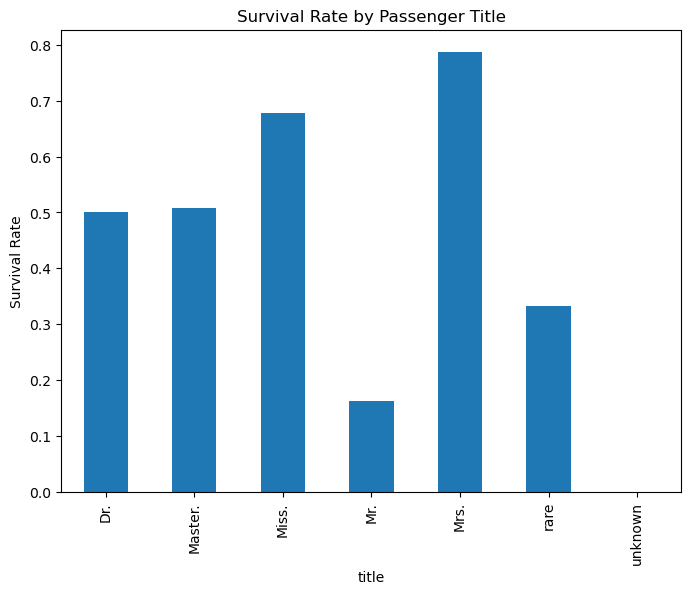

In [24]:
from nameparser import HumanName
def extract_title(row):
    if pd.notnull(row['name']):
        parsed_name = HumanName(row['name'])
        title = parsed_name.title
    else:
        title = 'unknown'
    return title

data['title'] = data.apply(extract_title, axis=1)

title_group_mapping = {
    'Lady.': 'rare',
    'Sir.': 'rare',
    'Col.': 'rare',
    'Capt.': 'rare',
    'Rev.': 'rare',
    '': 'rare',
    'the Countess. of': 'rare'
}

data['title'] = data['title'].replace('Mlle.', 'Miss.')
data['title'] = data['title'].replace('Ms.', 'Miss.')
data['title'] = data['title'].replace('Mme.', 'Mrs.')
data['title'] = data['title'].replace(title_group_mapping)

data = data.drop(columns=['name'])

survival_by_title = data.groupby('title')['survived'].mean()

print("\nSurvival rate by passenger title:")
print(survival_by_title)

plt.figure(figsize=(8, 6))
survival_by_title.plot(kind='bar')
plt.title('Survival Rate by Passenger Title')
plt.ylabel('Survival Rate')
plt.show()

In [28]:
data['tfsz'] = data['parch'] + data['sibsp'] + 1
data = data.drop(columns=['parch', 'sibsp'])

In [30]:
data = data.drop(index=1309)

<Axes: >

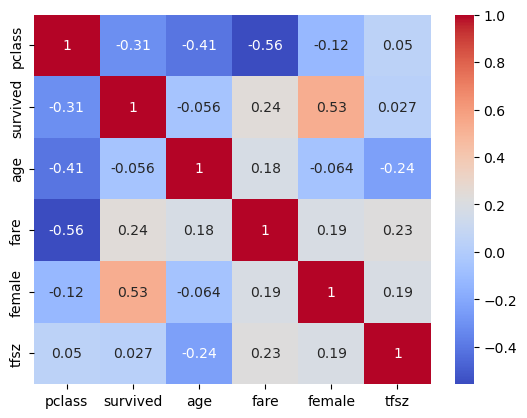

In [32]:
corr_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [ ]:
data =data.drop(columns=['ticket', 'cabin'])
data

In [40]:
data

,pclass,survived,age,fare,embarked,female,title,tfsz
0,1.0,1.0,29.0000,211.3375,S,1.0,Miss.,1.0
1,1.0,1.0,0.9167,151.5500,S,0.0,Master.,4.0
2,1.0,0.0,2.0000,151.5500,S,1.0,Miss.,4.0
3,1.0,0.0,30.0000,151.5500,S,0.0,Mr.,4.0
4,1.0,0.0,25.0000,151.5500,S,1.0,Mrs.,4.0
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,14.4542,C,1.0,Miss.,2.0
1305,3.0,0.0,NaN,14.4542,C,1.0,Miss.,2.0
1306,3.0,0.0,26.5000,7.2250,C,0.0,Mr.,1.0
1307,3.0,0.0,27.0000,7.2250,C,0.0,Mr.,1.0


In [42]:
data['age'] = data['age'].fillna(data['age'].median())

In [44]:
data

,pclass,survived,age,fare,embarked,female,title,tfsz
0,1.0,1.0,29.0000,211.3375,S,1.0,Miss.,1.0
1,1.0,1.0,0.9167,151.5500,S,0.0,Master.,4.0
2,1.0,0.0,2.0000,151.5500,S,1.0,Miss.,4.0
3,1.0,0.0,30.0000,151.5500,S,0.0,Mr.,4.0
4,1.0,0.0,25.0000,151.5500,S,1.0,Mrs.,4.0
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,14.4542,C,1.0,Miss.,2.0
1305,3.0,0.0,28.0000,14.4542,C,1.0,Miss.,2.0
1306,3.0,0.0,26.5000,7.2250,C,0.0,Mr.,1.0
1307,3.0,0.0,27.0000,7.2250,C,0.0,Mr.,1.0


In [46]:
print(data.isna().sum())

data.fillna(data.mean(numeric_only=True), inplace=True)

print("\nNaN values after replacement:")
print(data.isna().sum())

pclass      0
survived    0
age         0
fare        1
embarked    2
female      0
title       0
tfsz        0
dtype: int64

NaN values after replacement:
pclass      0
survived    0
age         0
fare        0
embarked    2
female      0
title       0
tfsz        0
dtype: int64


In [48]:
data = data.dropna(subset=['embarked'])

In [50]:
data

,pclass,survived,age,fare,embarked,female,title,tfsz
0,1.0,1.0,29.0000,211.3375,S,1.0,Miss.,1.0
1,1.0,1.0,0.9167,151.5500,S,0.0,Master.,4.0
2,1.0,0.0,2.0000,151.5500,S,1.0,Miss.,4.0
3,1.0,0.0,30.0000,151.5500,S,0.0,Mr.,4.0
4,1.0,0.0,25.0000,151.5500,S,1.0,Mrs.,4.0
...,...,...,...,...,...,...,...,...
1304,3.0,0.0,14.5000,14.4542,C,1.0,Miss.,2.0
1305,3.0,0.0,28.0000,14.4542,C,1.0,Miss.,2.0
1306,3.0,0.0,26.5000,7.2250,C,0.0,Mr.,1.0
1307,3.0,0.0,27.0000,7.2250,C,0.0,Mr.,1.0


Correlation Matrix for Numerical Columns:
            pclass  survived       age      fare    female      tfsz
pclass    1.000000 -0.310412 -0.375810 -0.557709 -0.121826  0.048807
survived -0.310412  1.000000 -0.047091  0.242902  0.527458  0.028005
age      -0.375810 -0.047091  1.000000  0.177234 -0.057161 -0.192931
fare     -0.557709  0.242902  0.177234  1.000000  0.183995  0.227433
female   -0.121826  0.527458 -0.057161  0.183995  1.000000  0.190041
tfsz      0.048807  0.028005 -0.192931  0.227433  0.190041  1.000000


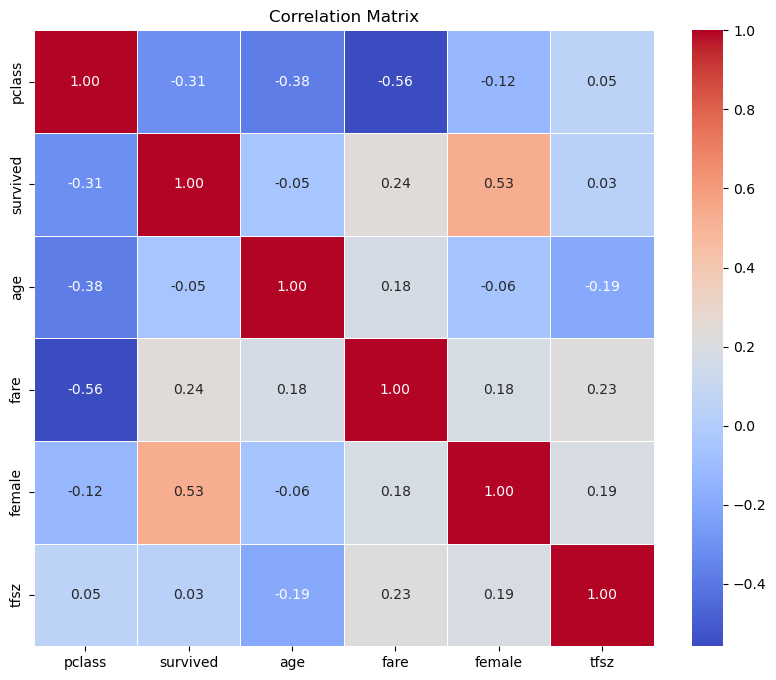

In [54]:
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




numerical_data = data.select_dtypes(include=['number'])

X = X_encoded
y = numerical_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       156
         1.0       0.71      0.69      0.70       106

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262

Confusion Matrix:
[[126  30]
 [ 33  73]]


In [66]:
X_encoded = pd.get_dummies(X)

print(X_encoded.head())

Encoded X:
   pclass      age      fare  female  tfsz  embarked_C  embarked_Q  \
0     1.0  29.0000  211.3375     1.0   1.0       False       False   
1     1.0   0.9167  151.5500     0.0   4.0       False       False   
2     1.0   2.0000  151.5500     1.0   4.0       False       False   
3     1.0  30.0000  151.5500     0.0   4.0       False       False   
4     1.0  25.0000  151.5500     1.0   4.0       False       False   

   embarked_S  title_Dr.  title_Master.  title_Miss.  title_Mr.  title_Mrs.  \
0        True      False          False         True      False       False   
1        True      False           True        False      False       False   
2        True      False          False         True      False       False   
3        True      False          False        False       True       False   
4        True      False          False        False      False        True   

   title_rare  
0       False  
1       False  
2       False  
3       False  
4       False

In [64]:
X=data.drop('survived', axis=1)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train_scaled, y_train)
y_pred_gbm = gbm_model.predict(X_test_scaled)

print("Gradient Boosting Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_gbm):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_gbm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_gbm))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Gradient Boosting Classifier:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       156
         1.0       0.75      0.68      0.71       106

    accuracy                           0.78       262
   macro avg       0.77      0.76      0.77       262
weighted avg       0.78      0.78      0.78       262

Confusion Matrix:
[[132  24]
 [ 34  72]]

Random Forest Classifier:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79       156
         1.0       0.70      0.65      0.68       106

    accuracy                           0.75       262
   macro avg       0.74      0.73      0.74       262
weighted avg       0.75      0.75      0.75       262

Confusion Matrix:
[[127  29]
 [ 37  69]]


In [74]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import make_pipeline

models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy')
    print(f"\n{name}:")
    print(f'Cross-Validation Accuracy Scores: {scores}')
    print(f'Mean Accuracy: {scores.mean():.2f}')
    print(f'Standard Deviation: {scores.std():.2f}')


Logistic Regression:
Cross-Validation Accuracy Scores: [0.79007634 0.83587786 0.77011494 0.82758621 0.82758621]
Mean Accuracy: 0.81
Standard Deviation: 0.03

Gradient Boosting:
Cross-Validation Accuracy Scores: [0.80152672 0.84351145 0.79693487 0.82375479 0.82758621]
Mean Accuracy: 0.82
Standard Deviation: 0.02

Random Forest:
Cross-Validation Accuracy Scores: [0.76335878 0.82442748 0.75095785 0.7816092  0.82758621]
Mean Accuracy: 0.79
Standard Deviation: 0.03


In [110]:
X_test

,pclass,age,fare,female,tfsz,embarked_C,embarked_Q,embarked_S,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_rare
1166,3.0,28.0,7.2250,0.0,1.0,True,False,False,False,False,False,True,False,False
1049,3.0,20.0,15.7417,0.0,3.0,True,False,False,False,False,False,True,False,False
795,3.0,28.0,7.2250,0.0,1.0,True,False,False,False,False,False,True,False,False
1059,3.0,28.0,8.0500,0.0,1.0,False,False,True,False,False,False,True,False,False
724,3.0,31.0,7.7500,0.0,1.0,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2.0,29.0,21.0000,0.0,2.0,False,False,True,False,False,False,True,False,False
140,1.0,23.0,63.3583,0.0,2.0,True,False,False,False,False,False,True,False,False
889,3.0,26.0,7.7750,0.0,1.0,False,False,True,False,False,False,True,False,False
314,1.0,50.0,211.5000,1.0,3.0,True,False,False,False,False,False,False,True,False


In [92]:
X_encoded

,pclass,age,fare,female,tfsz,embarked_C,embarked_Q,embarked_S,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_rare
0,1.0,29.0000,211.3375,1.0,1.0,False,False,True,False,False,True,False,False,False
1,1.0,0.9167,151.5500,0.0,4.0,False,False,True,False,True,False,False,False,False
2,1.0,2.0000,151.5500,1.0,4.0,False,False,True,False,False,True,False,False,False
3,1.0,30.0000,151.5500,0.0,4.0,False,False,True,False,False,False,True,False,False
4,1.0,25.0000,151.5500,1.0,4.0,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,14.4542,1.0,2.0,True,False,False,False,False,True,False,False,False
1305,3.0,28.0000,14.4542,1.0,2.0,True,False,False,False,False,True,False,False,False
1306,3.0,26.5000,7.2250,0.0,1.0,True,False,False,False,False,False,True,False,False
1307,3.0,27.0000,7.2250,0.0,1.0,True,False,False,False,False,False,True,False,False


In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n{name}:")
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


Logistic Regression:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       156
         1.0       0.71      0.69      0.70       106

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262

Confusion Matrix:
[[126  30]
 [ 33  73]]

Gradient Boosting:
Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       156
         1.0       0.75      0.68      0.71       106

    accuracy                           0.78       262
   macro avg       0.77      0.76      0.77       262
weighted avg       0.78      0.78      0.78       262

Confusion Matrix:
[[132  24]
 [ 34  72]]

Random Forest:
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.81    

In [96]:
import xgboost as xgb
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

print("\nXGBoost Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


XGBoost Model:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80       156
         1.0       0.71      0.67      0.69       106

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.74       262
weighted avg       0.75      0.76      0.75       262

Confusion Matrix:
[[127  29]
 [ 35  71]]


In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f'Mean Squared Error: {mse:.2f}')


Logistic Regression:
Mean Squared Error: 0.24

Gradient Boosting:
Mean Squared Error: 0.22

Random Forest:
Mean Squared Error: 0.25

XGBoost:
Mean Squared Error: 0.24



Correlation Matrix:
                 pclass       age      fare    female      tfsz  embarked_C  \
pclass         1.000000 -0.375810 -0.557709 -0.121826  0.048807   -0.271415   
age           -0.375810  1.000000  0.177234 -0.057161 -0.192931    0.076469   
fare          -0.557709  0.177234  1.000000  0.183995  0.227433    0.287181   
female        -0.121826 -0.057161  0.183995  1.000000  0.190041    0.067720   
tfsz           0.048807 -0.192931  0.227433  0.190041  1.000000   -0.037004   
embarked_C    -0.271415  0.076469  0.287181  0.067720 -0.037004    1.000000   
embarked_Q     0.230169 -0.030430 -0.129700  0.089445 -0.087493   -0.164463   
embarked_S     0.093071 -0.048137 -0.170962 -0.116741  0.088381   -0.778161   
title_Dr.     -0.098198  0.074067  0.030390 -0.037722 -0.006700    0.008417   
title_Master.  0.094912 -0.361465  0.011909 -0.164154  0.354970   -0.014347   
title_Miss.    0.027202 -0.253805  0.089274  0.676523  0.085770   -0.015700   
title_Mr.      0.119064  0.1632

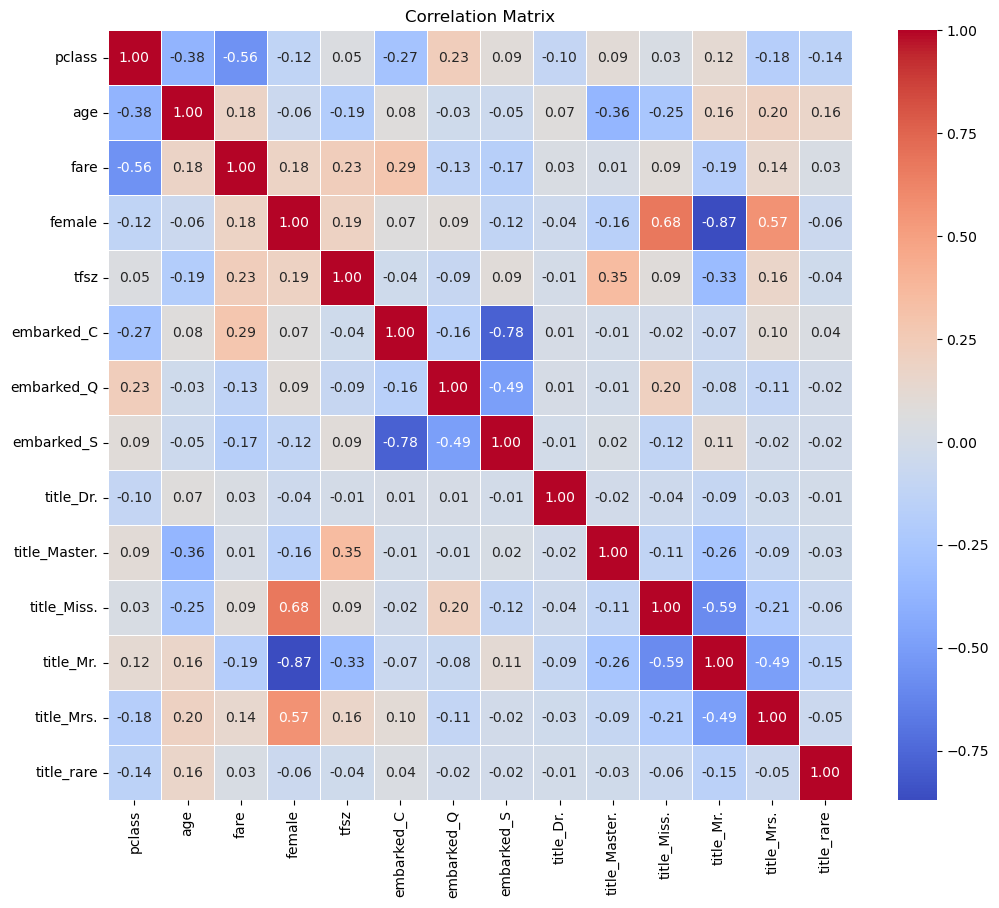

In [102]:
correlation_matrix =X.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\karth_f229yzr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karth_f229yzr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

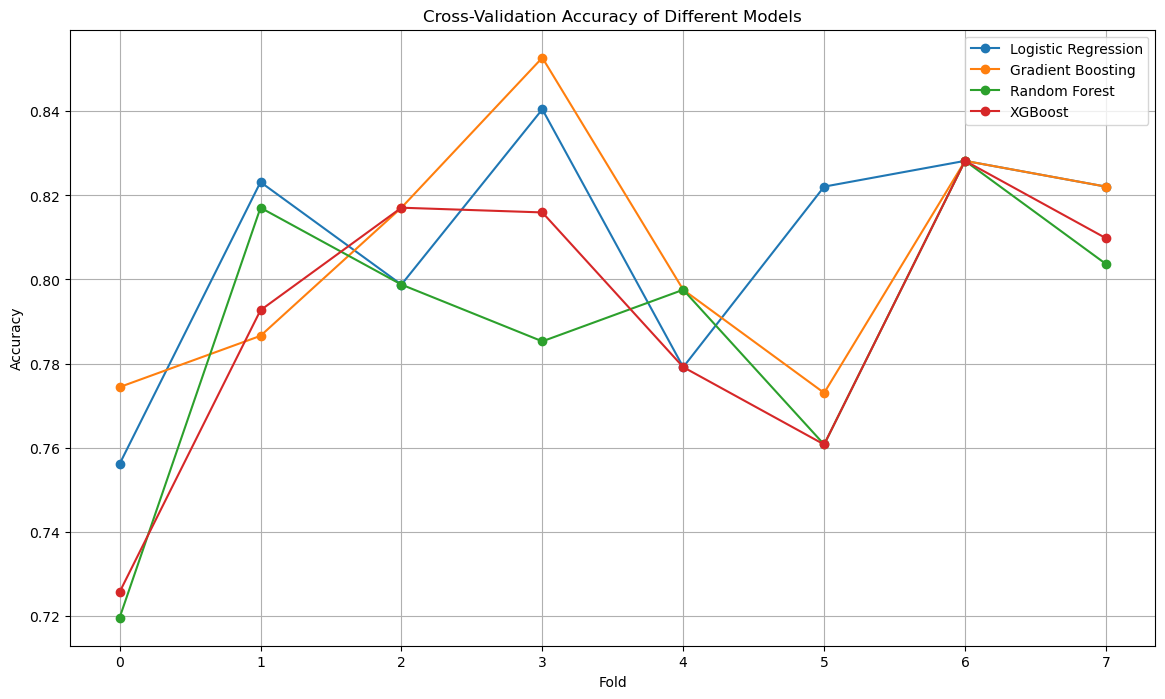

Logistic Regression Mean Accuracy: 0.81 ± 0.03
Gradient Boosting Mean Accuracy: 0.81 ± 0.03
Random Forest Mean Accuracy: 0.79 ± 0.03
XGBoost Mean Accuracy: 0.79 ± 0.03
Model Statistics:
Logistic Regression:
  Mean Accuracy: 0.81
  Max Accuracy: 0.8404907975460123
  Min Accuracy: 0.76
  Range: 0.08
Gradient Boosting:
  Mean Accuracy: 0.81
  Max Accuracy: 0.852760736196319
  Min Accuracy: 0.77
  Range: 0.08
Random Forest:
  Mean Accuracy: 0.79
  Max Accuracy: 0.8282208588957055
  Min Accuracy: 0.72
  Range: 0.11
XGBoost:
  Mean Accuracy: 0.79
  Max Accuracy: 0.8282208588957055
  Min Accuracy: 0.73
  Range: 0.10

Best Model: Logistic Regression with Mean Accuracy: 0.81


In [160]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),  
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42), 
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42), 
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)  
}

kf = KFold(n_splits=8, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_encoded, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores

plt.figure(figsize=(14, 8))

for name, scores in cv_results.items():
    plt.plot(scores, label=name, marker='o')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

for name, scores in cv_results.items():
    print(f"{name} Mean Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")
best_model = None
best_accuracy = -1
print("Model Statistics:")
for name, scores in cv_results.items():
    mean_acc = scores.mean()
    max_acc = scores.max()
    min_acc = scores.min()
    range_acc = max_acc - min_acc

    print(f"{name}:")
    print(f"  Mean Accuracy: {mean_acc:.2f}")
    print(f"  Max Accuracy: {max_acc}")
    print(f"  Min Accuracy: {min_acc:.2f}")
    print(f"  Range: {range_acc:.2f}")

    if mean_acc > best_accuracy:
        best_accuracy = mean_acc
        best_model = name

print(f"\nBest Model: {best_model} with Mean Accuracy: {best_accuracy:.2f}")

In [130]:
mse_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse

for name, mse in mse_results.items():
    print(f"{name} Mean Squared Error: {mse:.4f}")

Logistic Regression Mean Squared Error: 0.2405
Gradient Boosting Mean Squared Error: 0.2214
Random Forest Mean Squared Error: 0.2519
XGBoost Mean Squared Error: 0.2443


Logistic Regression Accuracy: 0.76
Gradient Boosting Accuracy: 0.78
Random Forest Accuracy: 0.75
XGBoost Accuracy: 0.76


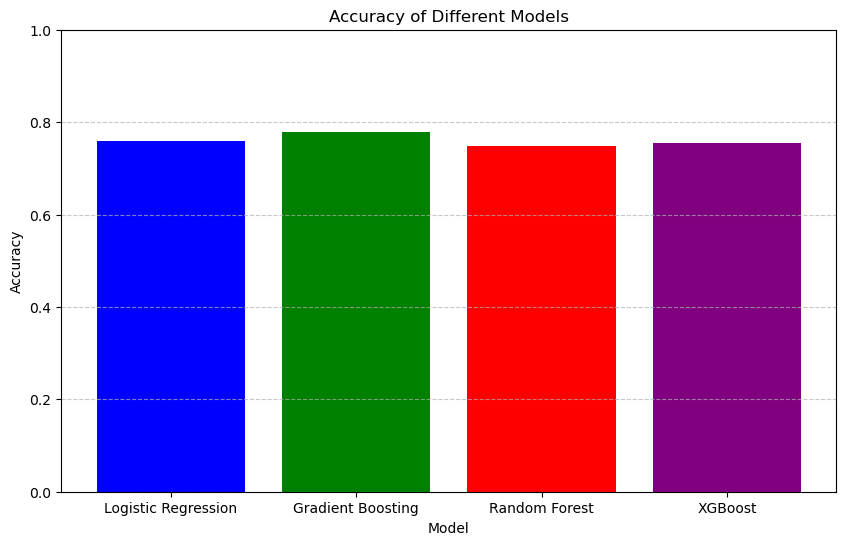

In [134]:
from sklearn.ensemble import VotingClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
}

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

for name, accuracy in accuracy_results.items():
    print(f"{name} Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6))

plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red', 'purple'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [136]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('gb', models['Gradient Boosting']),
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost'])
    ],
    voting='hard',
    weights=[1.44967142, 1.28617357, 1.36476885, 1.29230299]
)

# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Hard Voting Classifier Accuracy: {accuracy:.2f}")

# Print accuracy for individual models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Hard Voting Classifier Accuracy: 0.77
Logistic Regression Accuracy: 0.76
Gradient Boosting Accuracy: 0.78
Random Forest Accuracy: 0.75
XGBoost Accuracy: 0.76
